# Importing Libraries & Loading Datasets.

##  Importing Libraries

In [1]:
# importing libaraies
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Metrics helper
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)


## Loading Datasets

In [ ]:

dataset_path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", dataset_path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 146MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
csv_file_path = os.path.join(dataset_path, 'creditcard.csv')

df = pd.read_csv(csv_file_path)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing & Preparing Datasets.


 Checking for any missing values

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.isnull().values.any()

np.False_

Check for & remove duplicate rows

In [ ]:
print(df.duplicated().sum())

1081


In [ ]:
duplicates_rows = df[df.duplicated()]
duplicates_rows.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
223,145.0,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,...,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0
1178,919.0,0.904289,-0.538055,0.396058,0.500680,-0.864473,-0.657199,0.027231,-0.029473,0.265447,...,-0.099460,-0.597579,-0.048666,0.551824,0.182934,0.402176,-0.081357,0.027252,158.00,0
1180,919.0,1.207596,-0.036860,0.572104,0.373148,-0.709633,-0.713698,-0.181105,0.011277,0.283940,...,-0.194591,-0.514717,0.089714,0.543768,0.240581,0.418921,-0.051693,-0.000085,1.00,0
1382,1074.0,-2.248488,-0.195670,0.026949,-0.525780,-0.238759,-0.033359,0.162196,0.928520,-0.424215,...,-0.032208,-0.745757,-0.243193,-0.821633,-0.030402,0.335838,-0.286998,-0.243768,158.00,0


In [ ]:
df.drop_duplicates(inplace= True)

infomation about our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

 Statistical Distribution of Datasets

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# Exploratoty Data Analysis(EDA) & Visualization

Class Distrbution

In [ ]:
# class counts
class_count_df = (
    df['Class']
    .value_counts()
    .rename_axis('Class')
    .reset_index(name='Counts')
    .replace({'Class': {0: 'Normal', 1: 'Fraud'}})
)

# Show result
print("📊 Class Distribution:\n")
print(class_count_df)

📊 Class Distribution:

    Class  Counts
0  Normal  283253
1   Fraud     473


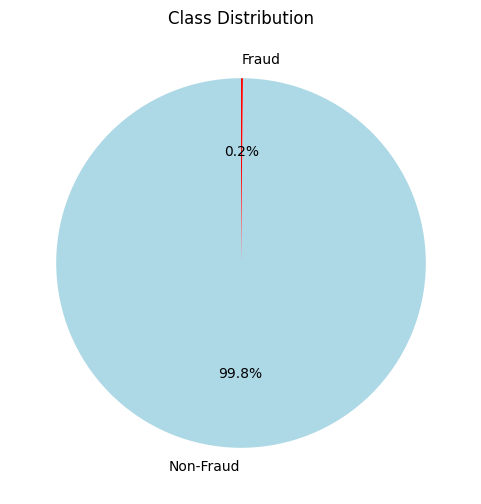

In [ ]:
# Plot pie chart for Class Distribution
counts = df['Class'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=['Non-Fraud', 'Fraud'],
        autopct='%1.1f%%', colors=['lightblue','red'], startangle=90)
plt.title("Class Distribution")
plt.show()

In [ ]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
fraud.shape, normal.shape

((473, 31), (283253, 31))

In [ ]:
fraud_frc = len(fraud)/len(df)
print(f"Percentage of Fraud  in dataset : {fraud_frc*100:.2f}%")

Percentage of Fraud  in dataset : 0.17%


Transaction Amount Analyzing


In [ ]:
fraud.Amount.describe()


,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [ ]:
normal.Amount.describe()


,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


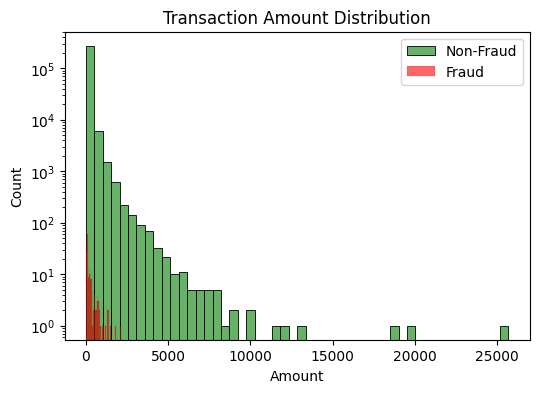

In [ ]:
# Amount distribution by class (log scale to handle skew)
plt.figure(figsize=(6,4))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='green', label='Non-Fraud', alpha=0.6)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraud', alpha=0.6)
plt.yscale('log')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

Distribution of Transaction Times by Class (Fraud vs Non-Fraud)

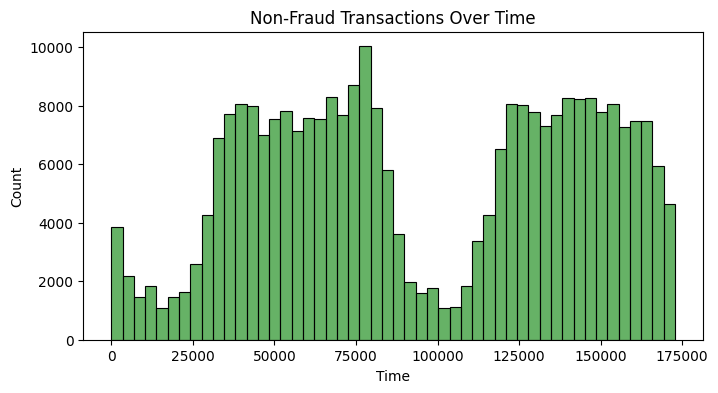

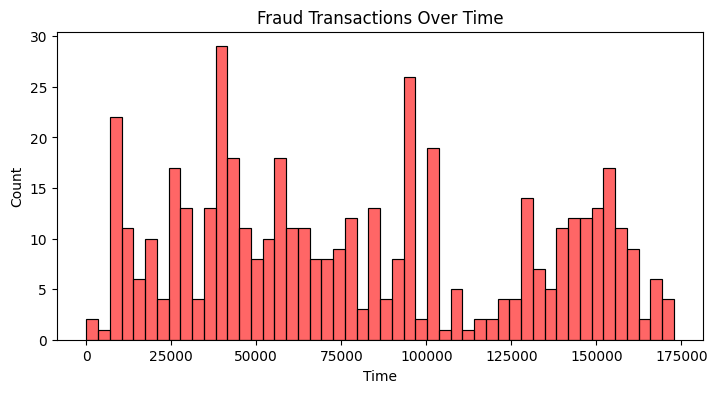

In [ ]:
bins = np.linspace(df['Time'].min(), df['Time'].max(), 51)

plt.figure(figsize=(8,4))
sns.histplot(df.loc[df['Class']==0, 'Time'], bins=bins, color='green', alpha=0.6)
plt.title('Non-Fraud Transactions Over Time')
plt.xlabel('Time'); plt.ylabel('Count')

plt.figure(figsize=(8.34,4))
sns.histplot(df.loc[df['Class']==1, 'Time'], bins=bins, color='red', alpha=0.6)
plt.title('Fraud Transactions Over Time')
plt.xlabel('Time'); plt.ylabel('Count')

plt.show()

 Correlation

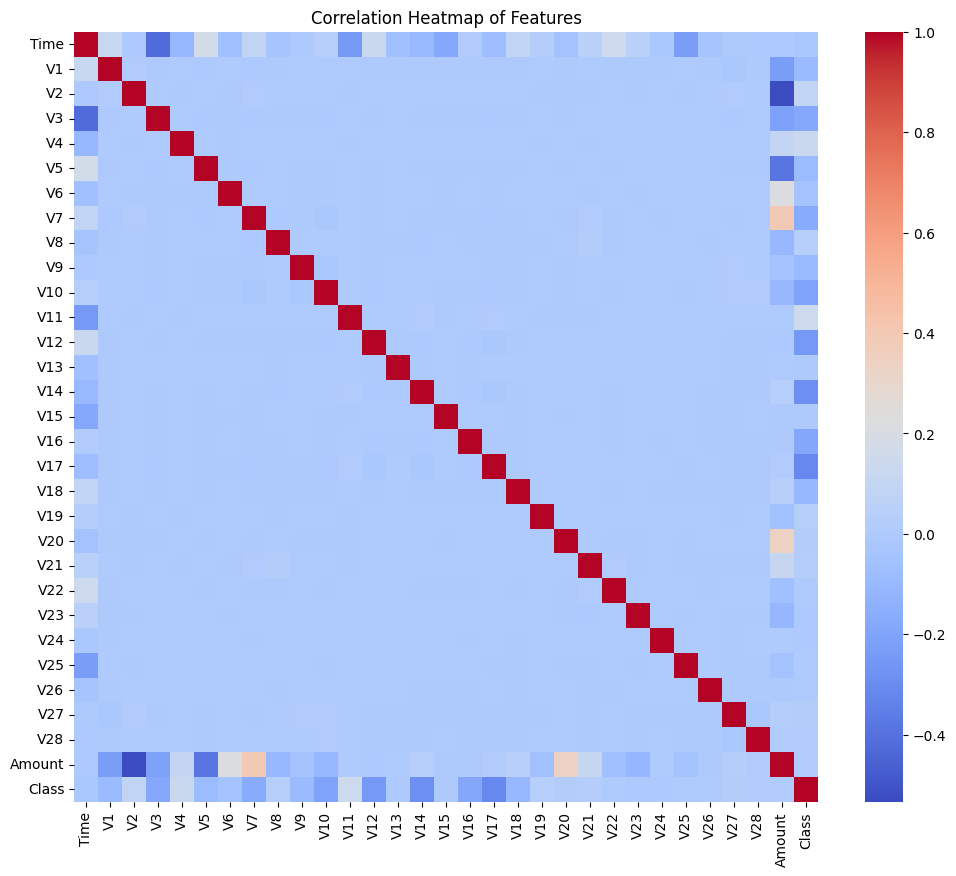

In [ ]:
 # Correlation heatmap for all numeric features.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

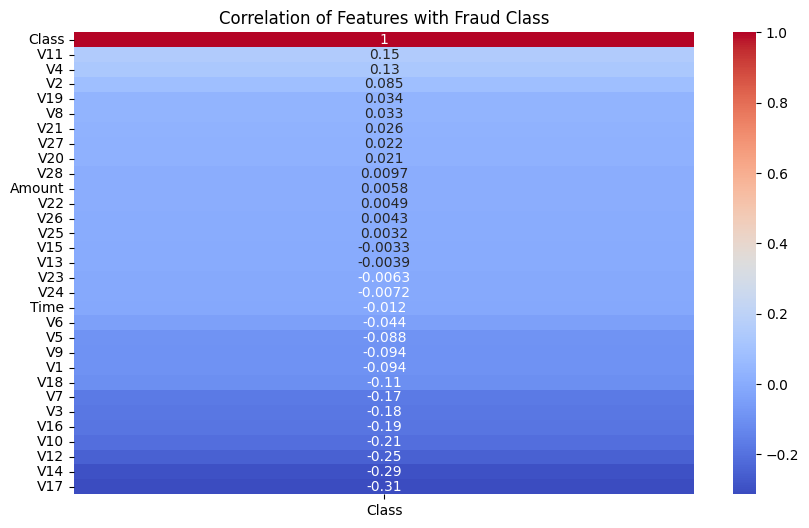

In [ ]:
#Correlation with Class
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Fraud Class')
plt.show()

fraud and non-fraud transactions over time

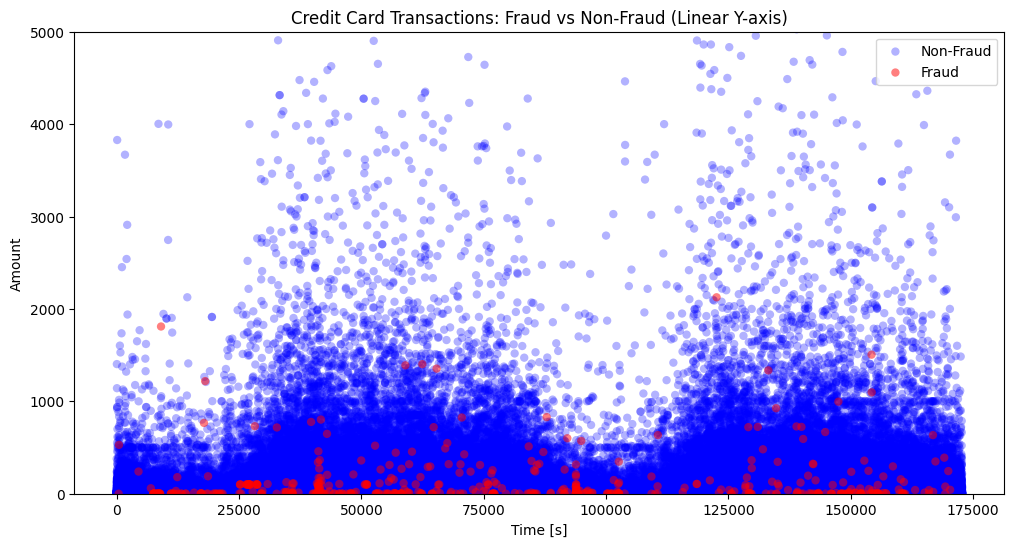

In [ ]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Create the scatter plot
plt.figure(figsize=(12, 6))

# Plot non-fraud transactions
plt.scatter(non_fraud['Time'], non_fraud['Amount'],
            color='blue', alpha=0.3, label='Non-Fraud', edgecolor='none')

# Plot fraud transactions
plt.scatter(fraud['Time'], fraud['Amount'],
            color='red', alpha=0.5, label='Fraud', edgecolor='none')

plt.xlabel('Time [s]')
plt.ylabel('Amount')
plt.title('Credit Card Transactions: Fraud vs Non-Fraud (Linear Y-axis)')

plt.ylim(0, 5000)

plt.legend()
plt.show()


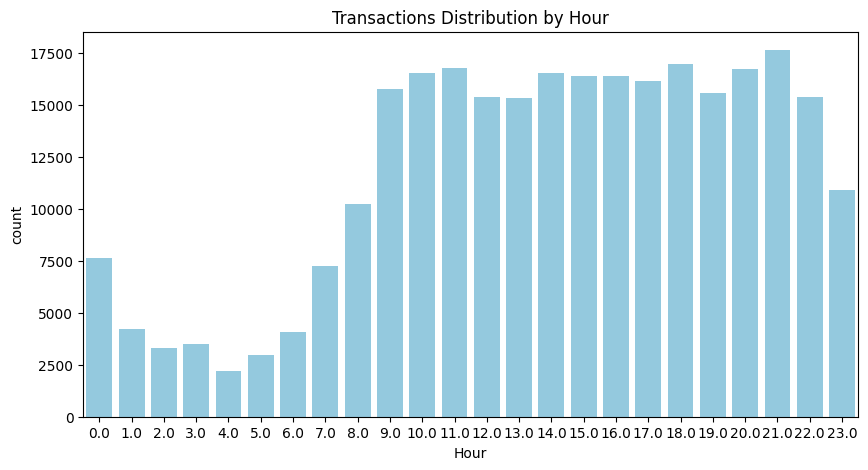

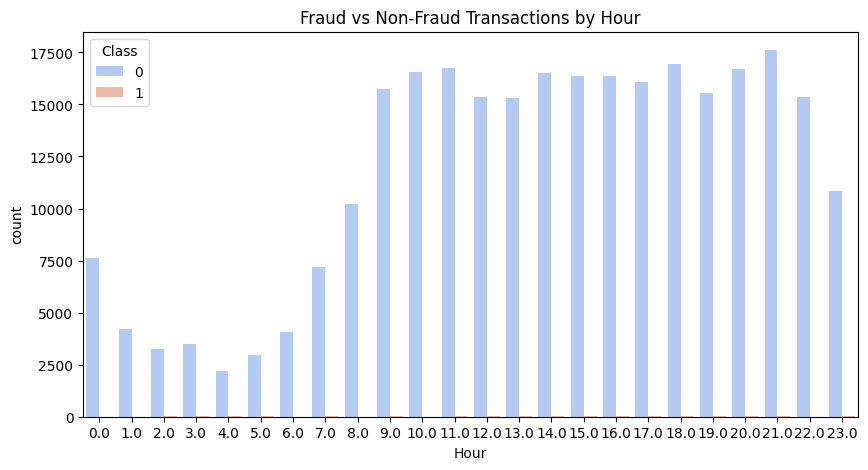

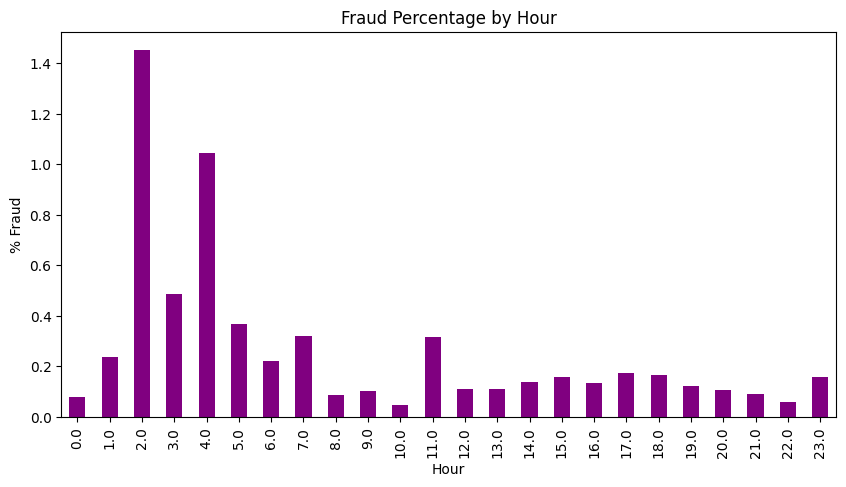

In [ ]:
# --- Time analysis by Hour ---

# Convert 'Time' (in seconds) into hours of the day
df['Hour'] = (df['Time'] // 3600) % 24

# 1) Distribution of all transactions by hour
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, color='skyblue')
plt.title('Transactions Distribution by Hour')
plt.show()

# 2) Fraud vs Non-Fraud transactions by hour
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', hue='Class', data=df, palette='coolwarm')
plt.title('Fraud vs Non-Fraud Transactions by Hour')
plt.show()

# 3) Fraud percentage by hour
fraud_pct = df.groupby('Hour')['Class'].mean() * 100
plt.figure(figsize=(10,5))
fraud_pct.plot(kind='bar', color='purple')
plt.title('Fraud Percentage by Hour')
plt.ylabel('% Fraud')
plt.show()


# Pre-Modeling Data Preparation and Validation Setup

### Define Features/target + Stratified split

In [ ]:
# Separate features and target
assert 'Class' in df.columns, "Target column 'Class' is missing."
X = df.drop(columns=['Class'])
y = df['Class'].astype(int)

# Keep the original test set imbalanced for realistic evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, " | Test shape:", X_test.shape)
print("Fraud count (train/test):", int(y_train.sum()), "/", int(y_test.sum()))


Train shape: (226980, 31)  | Test shape: (56746, 31)
Fraud count (train/test): 378 / 95


### Prepare scaler + choose columns

In [ ]:
#scale 'Amount' and 'Time'.
scaler_cols = [c for c in ['Amount', 'Time'] if c in X_train.columns]
scaler = StandardScaler()
print("Scaler will later be applied to:", scaler_cols)

Scaler will later be applied to: ['Amount', 'Time']




```
# This is formatted as code
```

### Prepare resampling options (to apply on TRAIN ONLY)

In [ ]:
# DO NOT resample the test set to avoid data leakage.
resamplers = {
    "none": None,  # model will handle imbalance internally (class_weight / scale_pos_weight)
    "oversample": RandomOverSampler(random_state=42),
    "undersample": RandomUnderSampler(random_state=42),
    "smote": SMOTE(random_state=42)
}

# Create balanced train variants (for later experiments)
balanced_sets = {"original": (X_train, y_train)}
for name, R in resamplers.items():
    if R is None:
        continue
    Xb, yb = R.fit_resample(X_train, y_train)
    balanced_sets[name] = (Xb, yb)
    print(f"{name:>10} → shape={Xb.shape} | class counts:\n{yb.value_counts()}\n")

oversample → shape=(453204, 31) | class counts:
Class
0    226602
1    226602
Name: count, dtype: int64

undersample → shape=(756, 31) | class counts:
Class
0    378
1    378
Name: count, dtype: int64

     smote → shape=(453204, 31) | class counts:
Class
0    226602
1    226602
Name: count, dtype: int64



### Compute scale_pos_weight (for XGBoost/LightGBM later)

In [ ]:
# ratio = negatives / positives on TRAIN
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
scale_pos_weight = neg / max(pos, 1)
print("scale_pos_weight (train):", round(scale_pos_weight, 2))

scale_pos_weight (train): 599.48


### Validation strategy (Stratified K-Fold)





In [ ]:
# Preserve class ratio across folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# (Optional) sanity check of class ratio in each validation fold
fold_stats = []
for i, (_, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
    yv = y_train.iloc[val_idx]
    fold_stats.append({"fold": i, "val_size": len(val_idx), "fraud": int(yv.sum()), "ratio(%)": round(100*yv.mean(), 4)})
pd.DataFrame(fold_stats)


,fold,val_size,fraud,ratio(%)
0,1,45396,75,0.1652
1,2,45396,75,0.1652
2,3,45396,76,0.1674
3,4,45396,76,0.1674
4,5,45396,76,0.1674


# Logistic Regression

In [ ]:
# Goal: Train Logistic Regression on balanced training data
from sklearn.linear_model import LogisticRegression

# instantiate model (more iterations; fixed seed)
log_reg = LogisticRegression(max_iter=10000, random_state=42)

# fit on balanced training set (after scaling + SMOTE/ROS)
log_reg.fit(X_train, y_train)

# confirmation
print("✅ Trained: Logistic Regression")



Define Evaluation Function for Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Helper function to evaluate Logistic Regression
def evaluate_model(y_true, y_pred, y_proba):
    print("=== Model Evaluation Results ===\n")

    print("ROC-AUC Score:")
    print(f"{roc_auc_score(y_true, y_proba):.4f}\n")

    print("Accuracy:")
    print(f"{accuracy_score(y_true, y_pred) * 100:.2f}%\n")

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))


Make Predictions and Evaluate Logistic Regression Model

In [ ]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred, y_proba)


Predict & Evaluate

In [ ]:
# Goal: Predict on original test set and evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# predictions (labels and probabilities)
y_pred  = log_reg.predict(X_test)              # 0/1 labels
y_proba = log_reg.predict_proba(X_test)[:,1]   # P(class=1)

# core metrics
roc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Threshold Tuning for Fraud Class

In [ ]:
# Tune threshold to improve precision
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score
import numpy as np

scores = y_proba
prec, rec, thr = precision_recall_curve(y_test, scores)

f1 = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1)
best_thr_f1 = thr[best_idx-1]

target_prec = 0.20
candidates = np.where(prec[:-1] >= target_prec)[0]
best_thr_prec = thr[candidates[np.argmax(rec[candidates])]] if len(candidates) else best_thr_f1

print(f"Best threshold by F1: {best_thr_f1:.3f}")
print(f"Chosen threshold: {best_thr_prec:.3f}")

y_pred_thr = (scores >= best_thr_prec).astype(int)

print("\nROC-AUC:", roc_auc_score(y_test, scores))
print("\nReport:\n", classification_report(y_test, y_pred_thr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thr))


Precision–Recall curve with chosen threshold

In [ ]:
# Precision-Recall Curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

prec, rec, thr = precision_recall_curve(y_test, scores)

plt.figure(figsize=(6,5))
plt.plot(rec, prec, label="PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

# plot chosen threshold point
plt.scatter(rec[np.argmax(thr >= best_thr_prec)],
            prec[np.argmax(thr >= best_thr_prec)],
            color="red", label=f"Chosen thr={best_thr_prec:.2f}")

plt.legend()
plt.grid(True)
plt.show()


Model Performance after Threshold Adjustment

In [ ]:
# Evaluate model at the chosen threshold
y_pred_thr = (y_proba >= best_thr_prec).astype(int)

print("== Evaluation at Tuned Threshold ==")
print(classification_report(y_test, y_pred_thr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thr))


Logistic Regression with Cross-Validation and Balancing Methods

In [ ]:
# Prepare features/labels
X = df.drop("Class", axis=1)
y = df["Class"]


In [ ]:
# CV evaluation for Logistic Regression with optional sampler/class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline

def evaluate_cv(X, y, sampler=None, class_weight=None, n_splits=5, seed=42):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    metrics = {"precision":[], "recall":[], "f1":[], "roc_auc":[], "pr_auc":[], "tp":[], "fp":[], "fn":[], "tn":[]}

    steps = [("scaler", StandardScaler())]
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.append(("clf", LogisticRegression(max_iter=1000, class_weight=class_weight, random_state=seed)))
    pipe = ImbPipeline(steps)

    for tr_idx, te_idx in cv.split(X, y):
        X_tr, X_te = X.iloc[tr_idx], X.iloc[te_idx]
        y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]

        pipe.fit(X_tr, y_tr)
        y_pred  = pipe.predict(X_te)
        y_proba = pipe.predict_proba(X_te)[:, 1]

        p  = precision_score(y_te, y_pred, zero_division=0)
        r  = recall_score(y_te, y_pred, zero_division=0)
        f1 = f1_score(y_te, y_pred, zero_division=0)
        roc = roc_auc_score(y_te, y_proba)
        ap  = average_precision_score(y_te, y_proba)
        tn, fp, fn, tp = confusion_matrix(y_te, y_pred).ravel()

        metrics["precision"].append(p); metrics["recall"].append(r); metrics["f1"].append(f1)
        metrics["roc_auc"].append(roc); metrics["pr_auc"].append(ap)
        metrics["tp"].append(tp); metrics["fp"].append(fp); metrics["fn"].append(fn); metrics["tn"].append(tn)

    import pandas as pd
    df_res = pd.DataFrame(metrics)
    summary = df_res.agg(["mean","std"]).round(4)
    return df_res, summary


Cross-Validation with Logistic Regression (class_weight=balanced)

In [ ]:
# Strategy A: class_weight='balanced'
res_cw, sum_cw = evaluate_cv(X, y, sampler=None, class_weight="balanced", n_splits=5, seed=42)
sum_cw


Cross-Validation with Logistic Regression + Random Over-Sampling

In [ ]:
# Strategy B: RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
res_ros, sum_ros = evaluate_cv(X, y, sampler=RandomOverSampler(random_state=42), class_weight=None, n_splits=5, seed=42)
sum_ros


Cross-Validation with Logistic Regression + SMOTE

In [ ]:
# Strategy C: SMOTE
from imblearn.over_sampling import SMOTE
res_sm, sum_sm = evaluate_cv(X, y, sampler=SMOTE(random_state=42), class_weight=None, n_splits=5, seed=42)
sum_sm


Cross-Validation with Logistic Regression + Random Under-Sampling

In [ ]:
# Strategy D: RandomUnderSampler (RUS)
from imblearn.under_sampling import RandomUnderSampler

res_rus, sum_rus = evaluate_cv(
    X, y,
    sampler=RandomUnderSampler(random_state=42),
    class_weight=None,
    n_splits=5,
    seed=42
)
sum_rus  # mean/std across folds


Compare Logistic Regression Balancing Methods

In [ ]:
# Compare strategies (mean across folds)
import pandas as pd

summary_table = pd.DataFrame({
    "class_weight": sum_cw.loc["mean"],
    "ROS":          sum_ros.loc["mean"],
    "SMOTE":        sum_sm.loc["mean"],
    "RUS":          sum_rus.loc["mean"]
}).T[["precision","recall","f1","roc_auc","pr_auc"]].sort_values("pr_auc", ascending=False)

summary_table



Final Logistic Regression Model (with SMOTE)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

final_sampler = SMOTE(random_state=42)

final_pipe = ImbPipeline([
    ("scaler", StandardScaler()),
    ("sampler", final_sampler),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])

final_pipe.fit(X, y)
print("✅ Final Logistic Regression fitted with max_iter=5000")


# Random Forest Classifier

 1-Import

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_recall_curve, auc,
    roc_curve, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)



2-Initialize the  Random Forest Classifier + Train the model


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model
print("Training Random Forest model...")
start_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

3-Evaluation summary (classification report + key metrics) +Confusion matrix

In [ ]:
print("Random Forest — Classification Report")
print(classification_report(y_test, y_pred_rf, digits=4))

# AUPRC (area under Precision–Recall curve)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
auprc_rf = auc(recall_rf, precision_rf)

# ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"AUPRC (PR AUC): {auprc_rf:.4f}")
print(f"ROC AUC:        {roc_auc_rf:.4f}")
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest — Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


4-Feature importance (table + plot)

In [ ]:
feature_importance = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
    .reset_index(drop=True)
)

display(feature_importance.head(20))

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(15),
    palette='viridis'
)
plt.title('Random Forest — Top 15 Feature Importance')
plt.tight_layout()
plt.show()

# XGboost Classifier

In [ ]:
# Imports
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    confusion_matrix, average_precision_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

In [ ]:
# Apply scaling to selected columns ( 'Amount' and 'Time')
preprocessor = ColumnTransformer(
    transformers=[('scale_amt_time', scaler, scaler_cols)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
def make_xgb(scale_pos_weight_val=1.0):
    """
    Build an XGBoost model.
    scale_pos_weight is used only for imbalanced data.
    """
    return XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        objective='binary:logistic',
        scale_pos_weight=scale_pos_weight_val
    )

In [ ]:
def cross_val_metrics(X, y, model, preprocessor, skf):
    """
    Perform Stratified K-Fold CV and return average metrics.
    """
    pipe = Pipeline([('prep', preprocessor), ('clf', model)])

    # Out-of-fold predictions
    proba = cross_val_predict(pipe, X, y, cv=skf, method="predict_proba")[:,1]
    preds = (proba >= 0.5).astype(int)

    return {
        "AUPRC": average_precision_score(y, proba),
        "Precision": precision_score(y, preds, zero_division=0),
        "Recall": recall_score(y, preds, zero_division=0),
        "F1": f1_score(y, preds, zero_division=0)
    }

In [ ]:
def evaluate_on_test(X_train, y_train, X_test, y_test, model, preprocessor):
    """
    Train on all train data and evaluate on original unbalanced test set.
    Returns a dictionary with AUPRC, Precision, Recall, F1.
    """
    pipe = Pipeline([('prep', preprocessor), ('clf', model)])
    pipe.fit(X_train, y_train)

    proba = pipe.predict_proba(X_test)[:,1]
    preds = (proba >= 0.5).astype(int)

    # Print metrics
    print("=== Test Evaluation on ORIGINAL unbalanced test set ===")
    print("AUPRC:", round(average_precision_score(y_test, proba), 4))
    print("Precision:", round(precision_score(y_test, preds, zero_division=0), 4))
    print("Recall:", round(recall_score(y_test, preds, zero_division=0), 4))
    print("F1:", round(f1_score(y_test, preds, zero_division=0), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

    # Return metrics for summary table
    return {
        "AUPRC": average_precision_score(y_test, proba),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1": f1_score(y_test, preds, zero_division=0)
    }

In [ ]:
print(">>> Experiment A: ORIGINAL imbalanced training data")

# Build model using scale_pos_weight
xgb_orig = make_xgb(scale_pos_weight_val=scale_pos_weight)

# CV metrics
cv_A = cross_val_metrics(X_train, y_train, xgb_orig, preprocessor, skf)

# Test metrics
test_metrics_orig = evaluate_on_test(X_train, y_train, X_test, y_test, xgb_orig, preprocessor)

>>> Experiment A: ORIGINAL imbalanced training data
=== Test Evaluation on ORIGINAL unbalanced test set ===
AUPRC: 0.8099
Precision: 0.65
Recall: 0.8211
F1: 0.7256
Confusion Matrix:
 [[56609    42]
 [   17    78]]


In [ ]:
# Dictionaries to store CV and test metrics for balanced variants
cv_metrics_dict = {}
test_metrics_dict = {}

for name, (Xb, yb) in balanced_sets.items():
    if name == "original":  # skip original, already done
        continue

    print(f"\n>>> Experiment B: Training on {name.upper()} balanced data")

    # Build XGBoost model (no class weight needed for balanced sets)
    xgb_bal = make_xgb(scale_pos_weight_val=1.0)

    # CV metrics
    cv_B = cross_val_metrics(Xb, yb, xgb_bal, preprocessor, skf)
    cv_metrics_dict[name] = cv_B  # store CV metrics

    # Test metrics (evaluate on original unbalanced test set)
    test_B = evaluate_on_test(Xb, yb, X_test, y_test, xgb_bal, preprocessor)
    test_metrics_dict[name] = test_B  # store test metrics

In [ ]:
# Final Summary Table

summary = []

#  Original (Experiment A)
summary.append({
    "Variant": "Original (scale_pos_weight)",
    "CV_AUPRC": round(cv_A["AUPRC"], 4),
    "CV_Recall": round(cv_A["Recall"], 4),
    "Test_AUPRC": round(test_metrics_orig["AUPRC"], 4),
    "Test_Recall": round(test_metrics_orig["Recall"], 4)
})

#  Balanced variants (Oversample, Undersample, SMOTE)
for name in cv_metrics_dict.keys():
    summary.append({
        "Variant": name.upper(),
        "CV_AUPRC": round(cv_metrics_dict[name]["AUPRC"], 4),
        "CV_Recall": round(cv_metrics_dict[name]["Recall"], 4),
        "Test_AUPRC": round(test_metrics_dict[name]["AUPRC"], 4),
        "Test_Recall": round(test_metrics_dict[name]["Recall"], 4)
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary)

# Display
print("\n=== Final Summary (Recall emphasized, AUPRC also important) ===")
print(summary_df.to_string(index=False))

In [ ]:
# fit the model first
xgb_orig.fit(X_train, y_train)

#  extract feature importance
feature_importance = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_orig.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
    .reset_index(drop=True)
)

# Display top 20 features
display(feature_importance.head(20))

# Plot top 15
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(15),
    palette='viridis'
)
plt.title('XGBoost — Top 15 Feature Importance')
plt.tight_layout()
plt.show()

# LightGBM

### Step 1 — LightGBM: Train

In [ ]:
# --- Sanity checks: labels and features ---
print("y_train dtype:", y_train.dtype, "| y_test dtype:", y_test.dtype)
print("y_train counts:\n", y_train.value_counts())
print("y_test counts:\n", y_test.value_counts())

# Ensure labels are only 0/1
assert set(y_train.unique()) <= {0,1} and set(y_test.unique()) <= {0,1}, "Labels must be 0/1 only"

# Quick variance check
non_zero_std = (X_train.std() != 0).sum()
print(f"Non-zero-std columns: {non_zero_std}/{X_train.shape[1]}")


In [ ]:
# --- Install/upgrade LightGBM ---
!pip -q install -U lightgbm

import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from lightgbm import early_stopping, log_evaluation

print("LightGBM version:", lgb.__version__)

# --- Prepare data ---
X_train_ = pd.DataFrame(X_train).astype(np.float32)
X_test_  = pd.DataFrame(X_test).astype(np.float32)
y_train_ = pd.Series(y_train).astype(int)
y_test_  = pd.Series(y_test).astype(int)

# imbalance info
neg, pos = int((y_train_==0).sum()), int((y_train_==1).sum())
soft_scale = (neg/pos)**0.5
print("neg:", neg, "pos:", pos, "soft_scale:", soft_scale)

# --- Build datasets ---
train_ds = lgb.Dataset(X_train_, label=y_train_)
valid_ds = lgb.Dataset(X_test_, label=y_test_, reference=train_ds)

# --- Parameters ---
params = {
    "objective": "binary",
    "metric": ["average_precision", "auc"],   # first metric = PR-AUC
    "learning_rate": 0.05,
    "num_leaves": 63,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.9,
    "bagging_freq": 1,
    "min_data_in_leaf": 20,
    "min_gain_to_split": 0.0,
    "force_col_wise": True,
    "verbosity": -1,
    "scale_pos_weight": soft_scale,
    "seed": 42,
}

# --- Train ---
model = lgb.train(
    params,
    train_set=train_ds,
    valid_sets=[valid_ds],
    num_boost_round=5000,
    callbacks=[
        early_stopping(stopping_rounds=100, first_metric_only=True),
        log_evaluation(50),
    ],
)

print("Best iteration:", model.best_iteration)

# --- Evaluate ---
proba = model.predict(X_test_, num_iteration=model.best_iteration)

print("ROC AUC :", roc_auc_score(y_test_, proba))
print("PR  AUC :", average_precision_score(y_test_, proba))

pred05 = (proba >= 0.5).astype(int)
print("\nReport @0.5")
print(classification_report(y_test_, pred05, digits=4))


### Step 2 — Threshold tuning + full evaluation

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 1) PR curve + Best-F1 threshold
proba = model.predict(X_test_, num_iteration=model.best_iteration)
prec, rec, thr = precision_recall_curve(y_test_, proba)
f1 = 2*(prec*rec)/(prec+rec+1e-9)
best_idx = np.argmax(f1)
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5

print(f"Best-F1 threshold = {best_thr:.4f} | P={prec[best_idx]:.4f} | R={rec[best_idx]:.4f} | F1={f1[best_idx]:.4f}")

# 2) Evaluate @best-F1
pred_best = (proba >= best_thr).astype(int)
print("\nReport @Best-F1 threshold")
print(classification_report(y_test_, pred_best, digits=4))
print("Confusion matrix @Best-F1:\n", confusion_matrix(y_test_, pred_best))

# 3) Optional: target a higher recall (e.g., >= 0.90)
target_recall = 0.90
idx = np.where(rec >= target_recall)[0]
if len(idx):
    i = idx[0]
    thr_rec = thr[i] if i < len(thr) else thr[-1]
    pred_rec = (proba >= thr_rec).astype(int)
    print(f"\nReport @Recall≥{target_recall} (thr≈{thr_rec:.4f})")
    print(classification_report(y_test_, pred_rec, digits=4))
    print("Confusion matrix @Recall target:\n", confusion_matrix(y_test_, pred_rec))
else:
    print(f"\nNo threshold reaches recall ≥ {target_recall}")

# 4) Plot PR curve (matplotlib only)
plt.figure()
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (LightGBM)")
plt.grid(True)
plt.show()


### Step 3 — Testing & Prediction (Run):

In [ ]:
import pandas as pd
import joblib

# Apply best threshold (1.0 here)
best_thr = 1.0
pred_best = (proba >= best_thr).astype(int)

# Save predictions
results = pd.DataFrame({
    "proba": proba,
    "pred_bestF1": pred_best,
    "true_label": y_test_
})
results.to_csv("lightgbm_predictions.csv", index=False)

# Save model
joblib.dump(model, "lightgbm_model.pkl")

print("Saved: lightgbm_predictions.csv, lightgbm_model.pkl")
print(results.head())


### : Step 4 — Final Summary

In [ ]:
import json
from sklearn.metrics import precision_score, recall_score, f1_score

# Metrics @best-F1 threshold
precision = precision_score(y_test_, pred_best)
recall = recall_score(y_test_, pred_best)
f1 = f1_score(y_test_, pred_best)

summary = {
    "best_iteration": int(model.best_iteration),
    "roc_auc": float(roc_auc_score(y_test_, proba)),
    "pr_auc": float(average_precision_score(y_test_, proba)),
    "best_f1_threshold": float(best_thr),
    "precision": float(precision),
    "recall": float(recall),
    "f1_score": float(f1)
}

with open("final_summary.json", "w") as f:
    json.dump(summary, f, indent=2)

print(json.dumps(summary, indent=2))
print("\nSaved: final_summary.json")


#Decision Tree Classifier

1) Setup & Imports

In [ ]:
# === 1) Setup & Imports ===
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_curve, auc, roc_auc_score,
    average_precision_score
)
from sklearn.preprocessing import label_binarize

# Optional plotting tweak
sns.set(font_scale=1.1)

2. Train the Decision Tree


In [ ]:
dt_model = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced', # helpful for imbalanc
    random_state=42
)

print("Training Decision Tree model...")
start_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

3. Predict on the Test Set ===

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)

4. Clasification Report + Accuracy ===

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("\nDecision Tree - Classification Report")
print(classification_report(y_test, y_pred_dt, digits=4))

# Add Accuracy here
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

In [ ]:
is_binary = (len(np.unique(y_train)) == 2)

if is_binary:
    # For binary: pick the positive class index (by sorted order; adjust if needed)
    pos_index = list(dt_model.classes_).index(sorted(dt_model.classes_)[-1])
    precision_dt, recall_dt, _ = precision_recall_curve(
        y_test, y_pred_proba_dt[:, pos_index], pos_label=dt_model.classes_[pos_index]
    )
    auprc_dt = auc(recall_dt, precision_dt)
    roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt[:, pos_index])
else:
    # For multiclass: macro-average over one-vs-rest
    classes_ = dt_model.classes_
    y_test_bin = label_binarize(y_test, classes=classes_)
    auprc_dt = average_precision_score(y_test_bin, y_pred_proba_dt, average='macro')
    roc_auc_dt = roc_auc_score(y_test_bin, y_pred_proba_dt, average='macro', multi_class='ovr')

print(f"\nAUPRC (PR AUC): {auprc_dt:.4f}")
print(f"ROC AUC:        {roc_auc_dt:.4f}")

6. Confusion Matrix (Heatmap)

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    xticklabels=dt_model.classes_, yticklabels=dt_model.classes_
)
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

7) Feature Importance

In [ ]:
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"f{i}" for i in range(X_train.shape[1])]

feature_importance = (
    pd.DataFrame({
        'Feature': feature_names,
        'Importance': dt_model.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
    .reset_index(drop=True)
)

# Show top features (table)
display(feature_importance.head(20))

# Plot top-k features
top_k = 15
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(top_k)
)
plt.title('Decision Tree – Top Feature Importances')
plt.tight_layout()
plt.show()

# Model Performance Summary

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Gather results from each model
summary_results = {
    "Model": ["Logistic Regression (tuned)", "Random Forest (balanced)", "XGBoost (scale_pos_weight)", "XGBoost (Oversample)", "XGBoost (Undersample)", "XGBoost (SMOTE)", "LightGBM(scale_pos_weight)"],
    "Precision": [
        precision_score(y_test, y_pred_thr),
        precision_score(y_test, y_pred_rf),
        test_metrics_orig["Precision"],
        test_metrics_dict["oversample"]["Precision"],
        test_metrics_dict["undersample"]["Precision"],
        test_metrics_dict["smote"]["Precision"],
        summary["precision"]
    ],
    "Recall": [
        recall_score(y_test, y_pred_thr),
        recall_score(y_test, y_pred_rf),
        test_metrics_orig["Recall"],
        test_metrics_dict["oversample"]["Recall"],
        test_metrics_dict["undersample"]["Recall"],
        test_metrics_dict["smote"]["Recall"],
         summary["recall"]
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_thr),
        f1_score(y_test, y_pred_rf),
        test_metrics_orig["F1"],
        test_metrics_dict["oversample"]["F1"],
        test_metrics_dict["undersample"]["F1"],
        test_metrics_dict["smote"]["F1"],
        summary["f1_score"]
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_proba), # From LR threshold tuning
        roc_auc_rf, # from RF evaluation
        round(test_metrics_orig["AUPRC"], 4), # Using AUPRC for consistency as it was used in XGBoost evaluation
        round(test_metrics_dict["oversample"]["AUPRC"], 4),
        round(test_metrics_dict["undersample"]["AUPRC"], 4),
        round(test_metrics_dict["smote"]["AUPRC"], 4),
        summary["roc_auc"]
    ],
    "PR AUC": [
         average_precision_score(y_test, y_proba), # From LR threshold tuning
        auprc_rf, # from RF evaluation
        test_metrics_orig["AUPRC"], # from XGBoost evaluation
        test_metrics_dict["oversample"]["AUPRC"],
        test_metrics_dict["undersample"]["AUPRC"],
        test_metrics_dict["smote"]["AUPRC"],
        summary["pr_auc"]
    ]
}

# Create DataFrame
summary_df = pd.DataFrame(summary_results)

# Display summary table
print("📊 Model Performance Summary:\n")
display(summary_df.round(4))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

# ===== Validate required columns =====
expected_cols = ["Model", "Precision", "Recall", "F1 Score", "ROC AUC", "PR AUC"]
missing = [c for c in expected_cols if c not in summary_df.columns]
assert not missing, f"Missing columns in summary_df: {missing}"

# ===== Ensure numeric types =====
summary_df = summary_df.copy()
for c in ["Precision", "Recall", "F1 Score", "ROC AUC", "PR AUC"]:
    summary_df[c] = pd.to_numeric(summary_df[c], errors="coerce")

# ===== Common setup =====
models = summary_df["Model"].tolist()
x = np.arange(len(models))

# ===== Figure 1: Precision / Recall / F1 (save + display once) =====
colors_perf = {"Precision": "#1f77b4", "Recall": "#ff7f0e", "F1 Score": "#d62728"}
metrics1 = ["Precision", "Recall", "F1 Score"]
width1 = 0.22

fig1, ax1 = plt.subplots(figsize=(12, 6))
for i, m in enumerate(metrics1):
    ax1.bar(x + (i - 1) * width1, summary_df[m].values, width1, label=m, color=colors_perf[m])
ax1.set_title("Performance Metrics")
ax1.set_xlabel("Model")
ax1.set_ylabel("Score")
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=25, ha="right")
ax1.set_ylim(0, 1.05)
ax1.legend()
ax1.grid(axis="y", linestyle="--", alpha=0.3)
fig1.tight_layout()
fig1.savefig("performance_metrics.png", dpi=300, bbox_inches="tight")
plt.close(fig1)  # prevent duplicate rendering
display(Image("performance_metrics.png"))

# ===== Figure 2: ROC-AUC / PR-AUC (save + display once) =====
colors_auc = {"ROC AUC": "#17becf", "PR AUC": "#2ca02c"}
metrics2 = ["ROC AUC", "PR AUC"]
width2 = 0.28

fig2, ax2 = plt.subplots(figsize=(12, 6))
for i, m in enumerate(metrics2):
    ax2.bar(x + (i - 0.5) * width2, summary_df[m].values, width2, label=m, color=colors_auc[m])
ax2.set_title("AUC Metrics")
ax2.set_xlabel("Model")
ax2.set_ylabel("Score")
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=25, ha="right")
ax2.set_ylim(0, 1.05)
ax2.legend()
ax2.grid(axis="y", linestyle="--", alpha=0.3)
fig2.tight_layout()
fig2.savefig("auc_metrics.png", dpi=300, bbox_inches="tight")
plt.close(fig2)  # prevent duplicate rendering
display(Image("auc_metrics.png"))


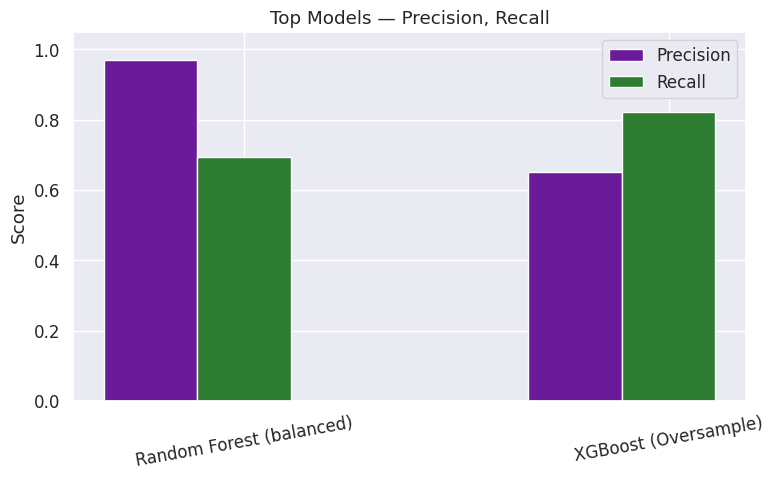

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Select the two models from summary_df
wanted_models = ["Random Forest (balanced)", "XGBoost (Oversample)"]
df2 = (summary_df.set_index("Model")
                  .loc[wanted_models, ["Precision", "Recall"]])

# --- Prepare arrays
models    = df2.index.tolist()
precision = df2["Precision"].to_numpy()
recall    = df2["Recall"].to_numpy()

# --- Plot (labels/positions)
metrics = [precision, recall]
labels  = ["Precision", "Recall"]
x = np.arange(len(models))
width = 0.22
colors = ["#6A1B9A", "#2E7D32"]  # purple, green

plt.figure(figsize=(8, 5))
for i, vals in enumerate(metrics):
    plt.bar(x + (i - 1) * width, vals, width, label=labels[i], color=colors[i])

plt.xticks(x, models, rotation=10)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Top Models — Precision, Recall")
plt.legend()
plt.tight_layout()
plt.show()
